# Imports

In [1]:
import json
import pathlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

# Constants

In [4]:
PROJECT_DIR = pathlib.Path('~/work').expanduser()
DATA_DIR = PROJECT_DIR / 'data'

In [5]:
# https://rstudio-pubs-static.s3.amazonaws.com/120883_c8123ff272164b2a94be097a6237150b.html
YELP_DATA_DIR = DATA_DIR / 'yelp' / 'v6' / 'yelp_dataset_challenge_academic_dataset'

# Figure 2-12

Box-Cox transforms for different values of λ

In [6]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

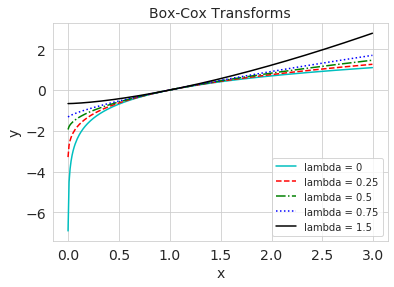

In [7]:
fig, ax = plt.subplots()
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 
            'lambda = 0.25', 
            'lambda = 0.5', 
            'lambda = 0.75', 
            'lambda = 1.5'], 
           loc='lower right')
ax.tick_params(labelsize=14)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)
plt.show()

# Example 2-12

Box-Cox transformation of Yelp business review counts

In [8]:
with open(YELP_DATA_DIR / 'yelp_academic_dataset_business.json') as biz_f:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])

In [9]:
from scipy import stats

In [10]:
# Box-Cox transform assumes that input data is positive. 
# Check the min to make sure.
biz_df['review_count'].min()

3

In [11]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
# By default, the scipy implementation of Box-Cox transform finds the lmbda parameter
# that will make the output the closest to a normal distribution
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.41065108575821513

# Example 2-13

Visualizing the histograms of original, log transformed, and Box-Cox
transformed counts

In [12]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

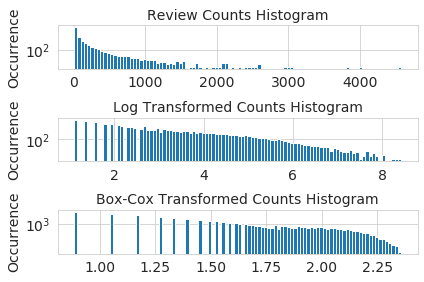

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

plt.tight_layout()
plt.show()

# Example 2-14

Probability plots of original and transformed counts against the normal
distribution

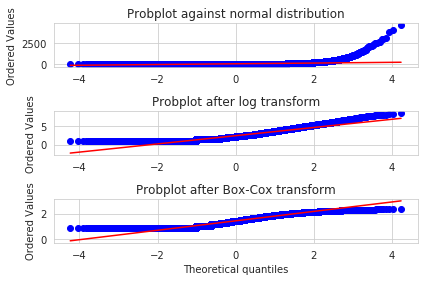

In [14]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1)

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

plt.tight_layout()
plt.show()